# Ecommerce Customers

# Problem Statement
A project with an Ecommerce company sells clothing online but they also have in-store style
and clothing advice sessions. Customers come in to the store, have sessions/meetings with
a personal stylist, then they can go home and order either on a mobile app or website for the
clothes they want. The company is trying to decide whether to focus their efforts on their
mobile app experience or their website. They have asked to help them figure it out.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import datasets
data=pd.read_csv('Ecommerce_Customers.csv',index_col=False)

In [3]:
data

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
data.shape

(500, 8)

In [5]:
data.size

4000

In [6]:
# Check null values in the dataset
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
# Summary statistics and info about the dataset
data.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
# Check Duplicates
data.duplicated().any()

False

In [10]:
# Drop the columns which is not required for prediction
data1 = data.drop(['Email','Address','Avatar'],axis=1)

In [11]:
data1

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


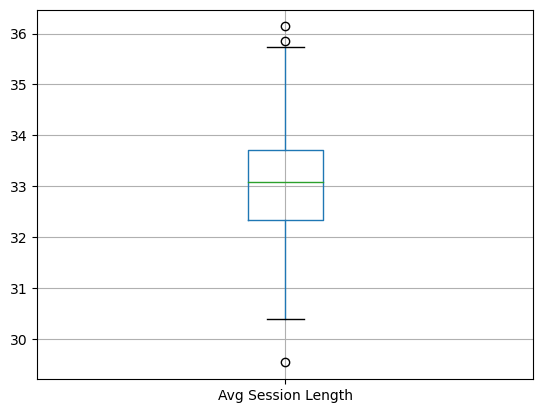

In [12]:
# Check outliers
data1.boxplot('Avg Session Length')
plt.show()

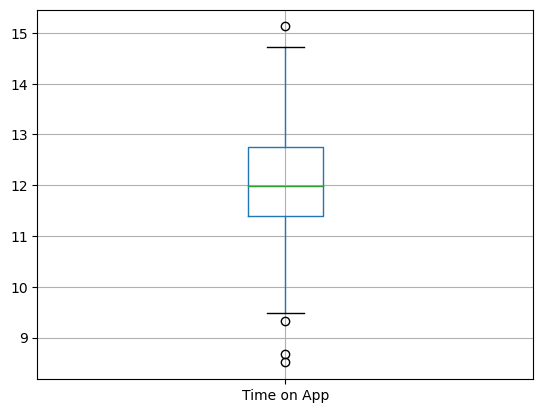

In [13]:
data1.boxplot('Time on App')
plt.show()

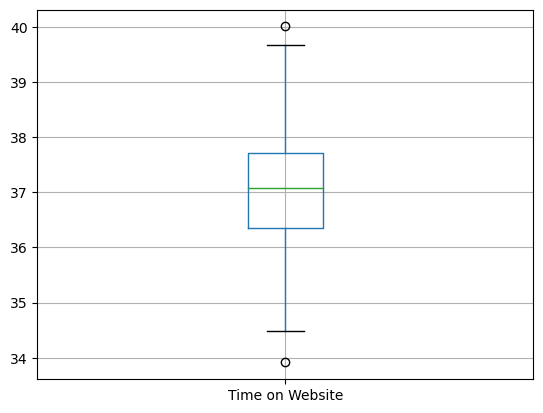

In [14]:
data1.boxplot('Time on Website')
plt.show()

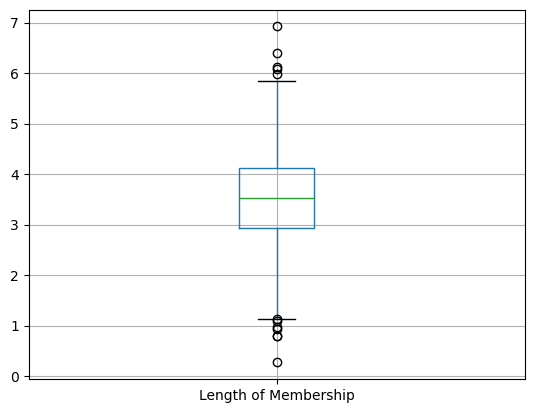

In [15]:
data1.boxplot('Length of Membership')
plt.show()

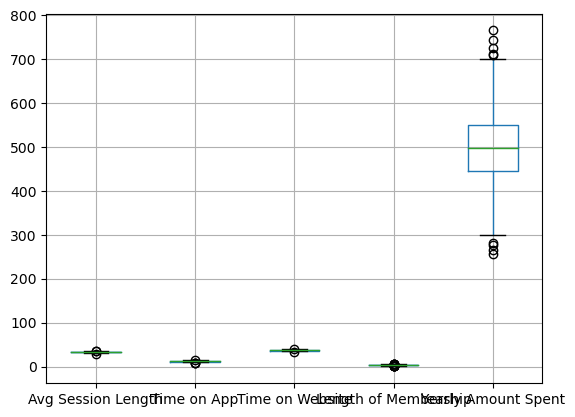

In [16]:
data1.boxplot()
plt.show()

In [17]:
# Function to remove outliers using IQR method
def remove_outliers(data1):
    for col in data1.select_dtypes(include='number').columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data1[col].quantile(0.27)
        Q3 = data1[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_extreme = Q1 - 1.5 * IQR
        upper_extreme = Q3 + 1.5 * IQR
        
        # Remove outliers
        data1 = data1[(data1[col] > lower_extreme) & (data1[col] < upper_extreme)]
    
    return data1

In [18]:
# Remove outliers from all columns
new_data = remove_outliers(data1)
print(new_data)

     Avg Session Length  Time on App  Time on Website  Length of Membership  \
0             34.497268    12.655651        39.577668              4.082621   
1             31.926272    11.109461        37.268959              2.664034   
2             33.000915    11.330278        37.110597              4.104543   
3             34.305557    13.717514        36.721283              3.120179   
4             33.330673    12.795189        37.536653              4.446308   
..                  ...          ...              ...                   ...   
495           33.237660    13.566160        36.417985              3.746573   
496           34.702529    11.695736        37.190268              3.576526   
497           32.646777    11.499409        38.332576              4.958264   
498           33.322501    12.391423        36.840086              2.336485   
499           33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054

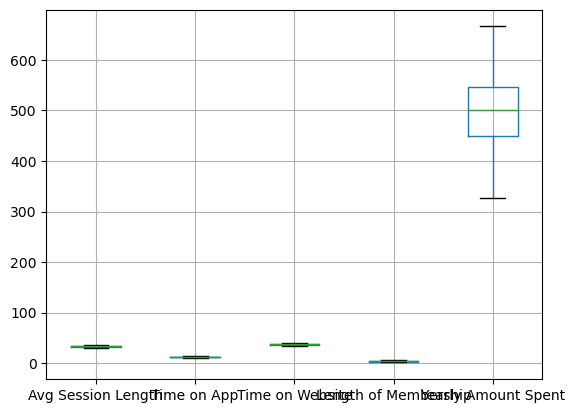

In [19]:
# Visualization after removed outliers
new_data.boxplot()
plt.show()

In [20]:
# Compute the correlation matrix
corr_matrix=new_data.corr()
corr_matrix

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027659,-0.004766,-0.028240,0.325563
Time on App,-0.027659,1.000000,0.053090,-0.050272,0.499618
Time on Website,-0.004766,0.053090,1.000000,-0.054184,-0.011554
Length of Membership,-0.028240,-0.050272,-0.054184,1.000000,0.746028
Yearly Amount Spent,0.325563,0.499618,-0.011554,0.746028,1.000000


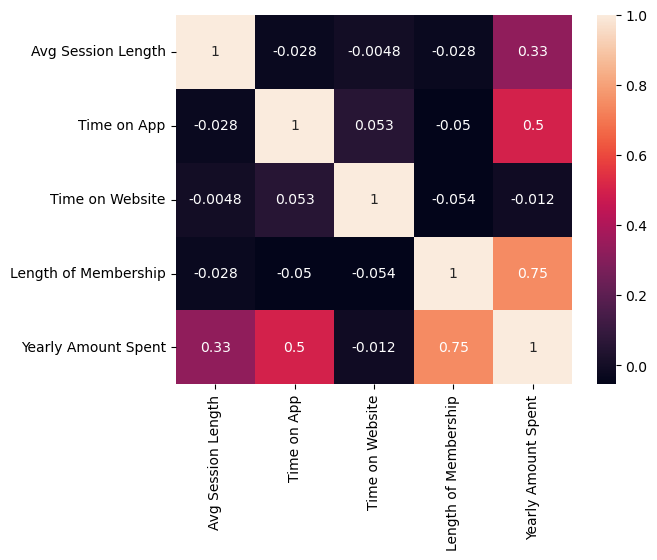

In [21]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Visualization 

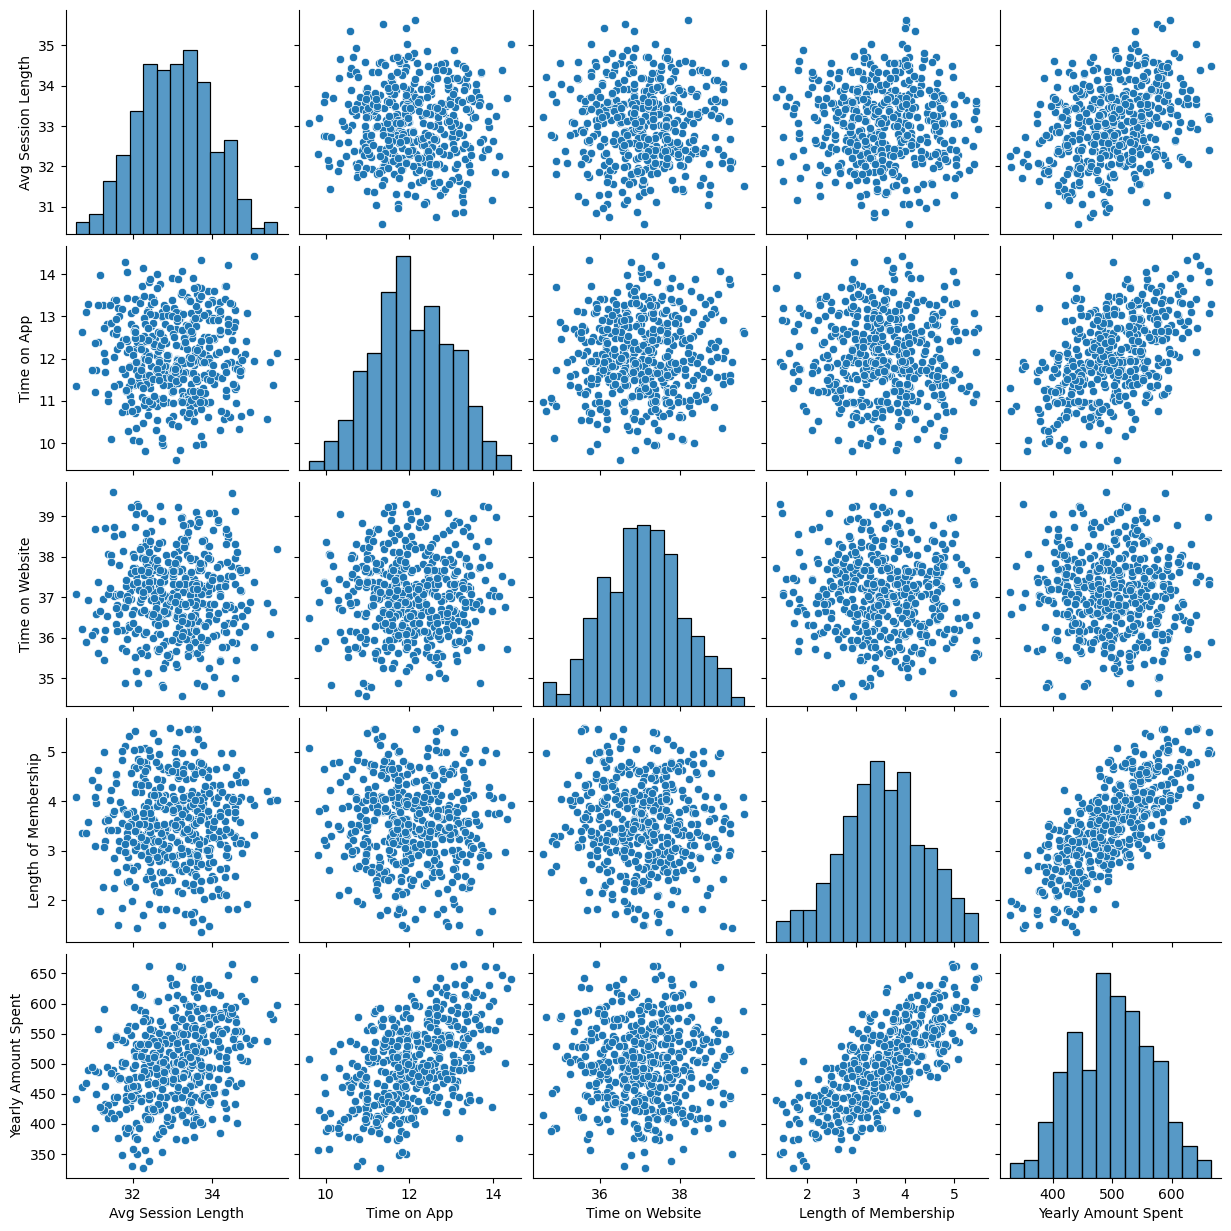

In [22]:
# Pairplot for a subset of variables
sns.pairplot(new_data)
plt.show()

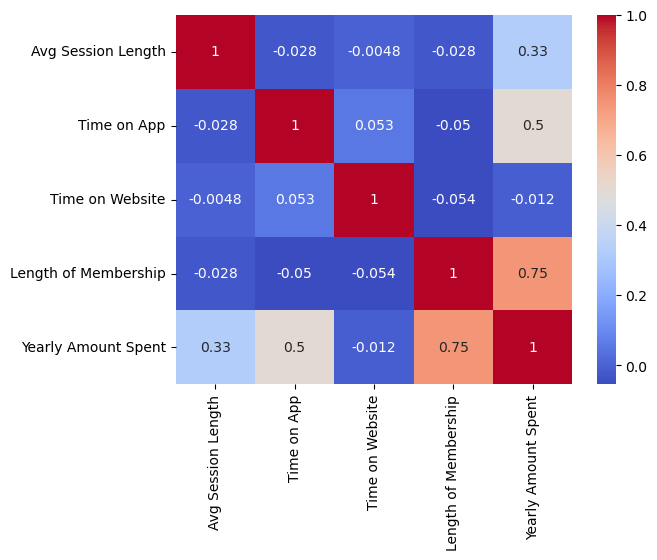

In [23]:
# Correlation heatmap
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.show()

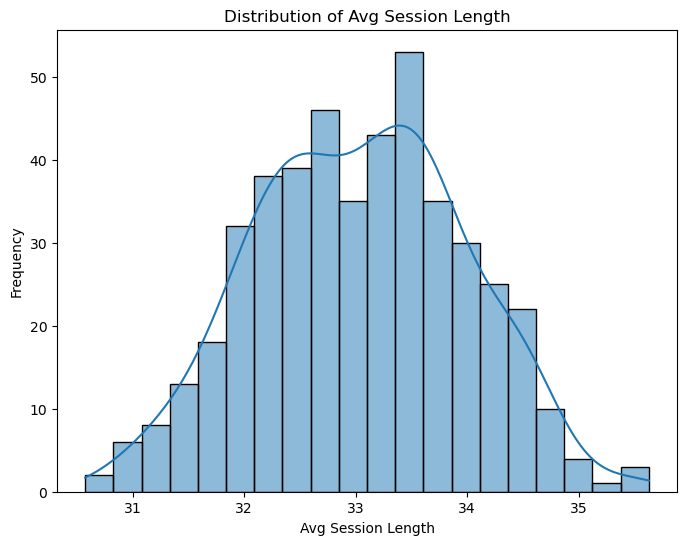

In [24]:
# Univariate Analysis
# Histogram of Avg Session Length
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Avg Session Length'], bins=20, kde=True)
plt.title('Distribution of Avg Session Length')
plt.xlabel('Avg Session Length')
plt.ylabel('Frequency')
plt.show()

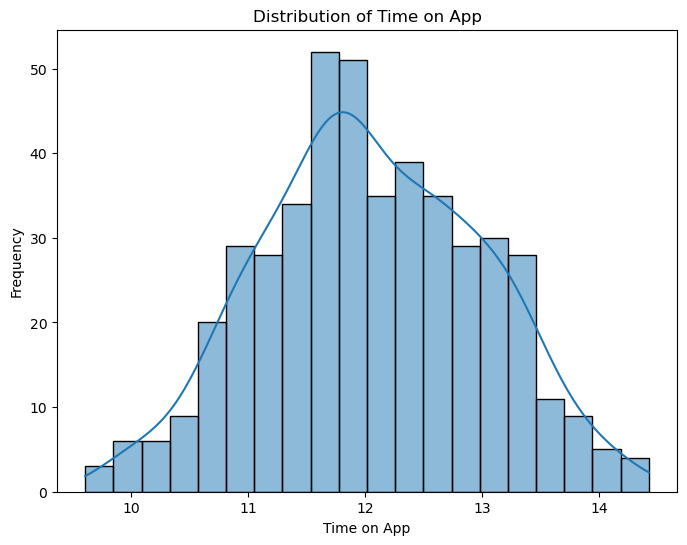

In [25]:
# Histogram of Time on App
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Time on App'], bins=20, kde=True)
plt.title('Distribution of Time on App')
plt.xlabel('Time on App')
plt.ylabel('Frequency')
plt.show()

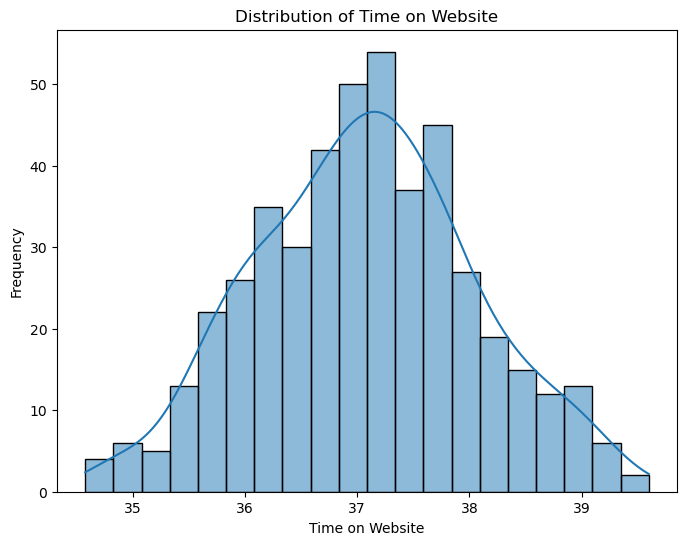

In [26]:
# Histogram of Time on Website
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Time on Website'], bins=20, kde=True)
plt.title('Distribution of Time on Website')
plt.xlabel('Time on Website')
plt.ylabel('Frequency')
plt.show()

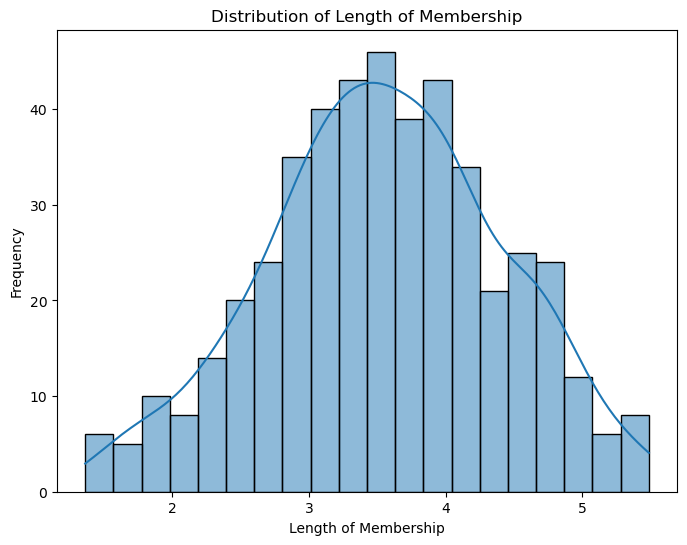

In [27]:
# Histogram of Length of Membership
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Length of Membership'], bins=20, kde=True)
plt.title('Distribution of Length of Membership')
plt.xlabel('Length of Membership')
plt.ylabel('Frequency')
plt.show()

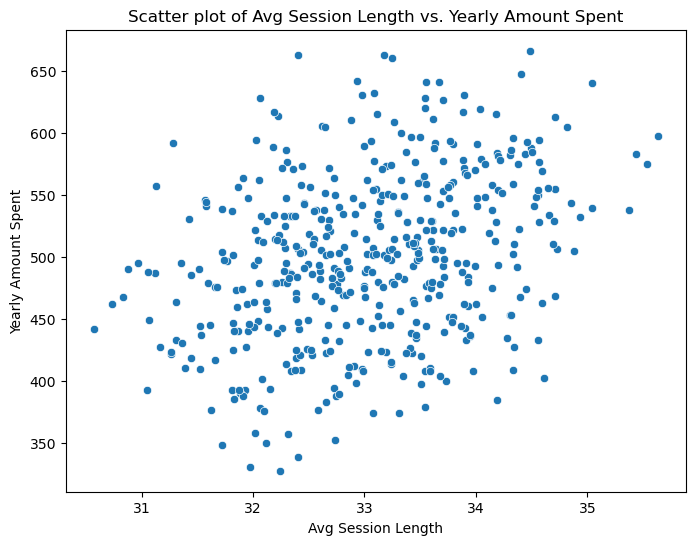

In [28]:
# Scatter plot of Avg Session Length vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Avg Session Length', y='Yearly Amount Spent')
plt.title('Scatter plot of Avg Session Length vs. Yearly Amount Spent')
plt.xlabel('Avg Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

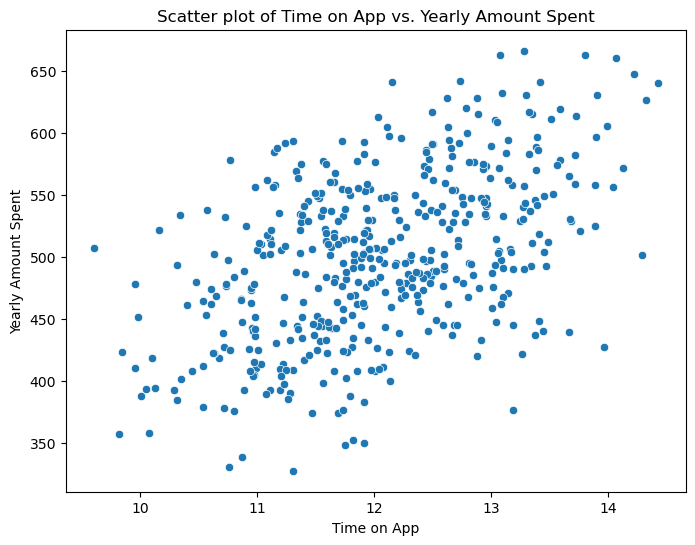

In [29]:
# Scatter plot of Time on App vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Time on App', y='Yearly Amount Spent')
plt.title('Scatter plot of Time on App vs. Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

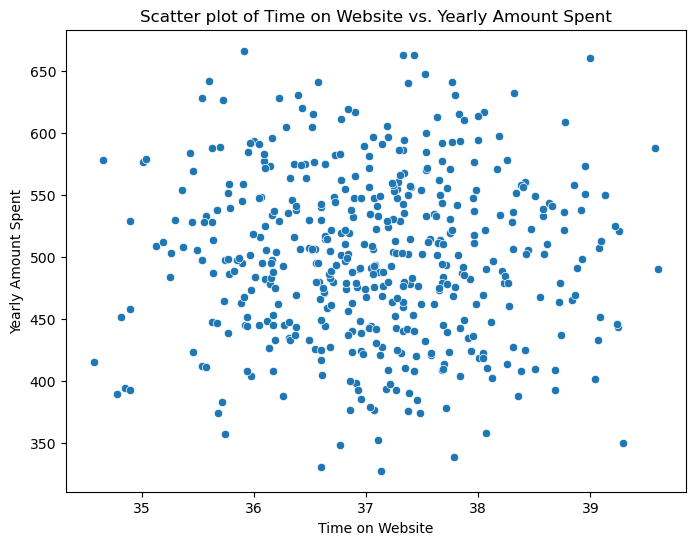

In [30]:
# Scatter plot of Time on Website vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Time on Website', y='Yearly Amount Spent')
plt.title('Scatter plot of Time on Website vs. Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.show()

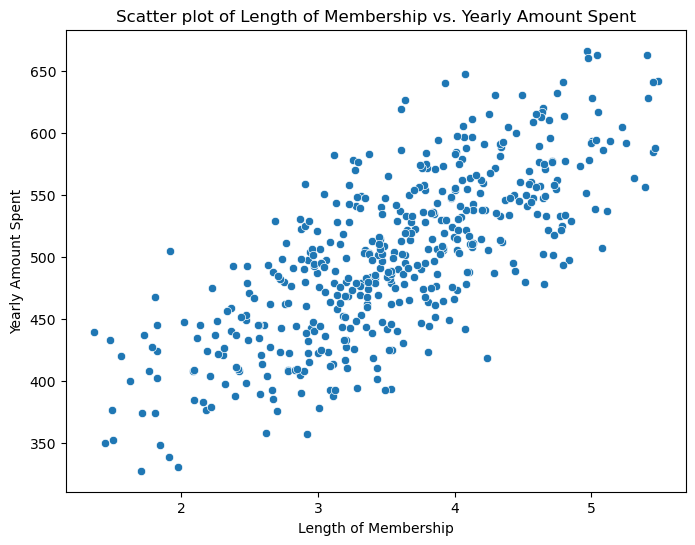

In [31]:
# Scatter plot of Length of Membership vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Length of Membership', y='Yearly Amount Spent')
plt.title('Scatter plot of Length of Membership vs. Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

# Auto EDA

In [32]:
# Generate the EDA report using sweetviz
import sweetviz as sv

In [33]:
report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [34]:
report.show_html('sweetviz_report.html')

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Processing

In [35]:
# import standardscaler
from sklearn.preprocessing import StandardScaler

In [36]:
std=StandardScaler()

In [37]:
sdata=std.fit_transform(data1)

In [38]:
sdata

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651,  1.11865385],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735, -1.35178302],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 , -0.14850091],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105,  0.66013536],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197, -0.54072439],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926, -0.01937765]])

In [39]:
# convert array into dataframes 
std_data=pd.DataFrame(sdata,columns=new_data.columns)

In [40]:
# Standardized data
std_data

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.456351,0.607280,2.493589,0.550107,1.118654
1,-1.136502,-0.949464,0.206556,-0.870927,-1.351783
2,-0.052723,-0.727139,0.049681,0.572067,-0.148501
3,1.263010,1.676390,-0.335978,-0.413996,1.041684
4,0.279838,0.747770,0.471737,0.914422,1.263224
...,...,...,...,...,...
495,0.186035,1.524003,-0.636429,0.213479,0.940658
496,1.663357,-0.359187,0.128603,0.043139,0.375274
497,-0.409872,-0.556854,1.260187,1.427261,0.660135
498,0.271597,0.341248,-0.218291,-1.199042,-0.540724


In [41]:
# Split the data into features and target

In [42]:
target=std_data['Yearly Amount Spent']

In [43]:
target

0      1.118654
1     -1.351783
2     -0.148501
3      1.041684
4      1.263224
         ...   
495    0.940658
496    0.375274
497    0.660135
498   -0.540724
499   -0.019378
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [44]:
features=std_data.drop('Yearly Amount Spent',axis=1)

In [45]:
features

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,1.456351,0.607280,2.493589,0.550107
1,-1.136502,-0.949464,0.206556,-0.870927
2,-0.052723,-0.727139,0.049681,0.572067
3,1.263010,1.676390,-0.335978,-0.413996
4,0.279838,0.747770,0.471737,0.914422
...,...,...,...,...
495,0.186035,1.524003,-0.636429,0.213479
496,1.663357,-0.359187,0.128603,0.043139
497,-0.409872,-0.556854,1.260187,1.427261
498,0.271597,0.341248,-0.218291,-1.199042


In [46]:
# Import train_test_split to split the datas
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.25,random_state=75)

In [48]:
x_train.shape

(125, 4)

In [49]:
x_test.shape

(375, 4)

In [50]:
y_train.shape

(125,)

In [51]:
y_test.shape

(375,)

# Model Building

## Linear Regression

In [52]:
# Model Building using linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lin_reg=LinearRegression()

In [55]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred=lin_reg.predict(x_test)

In [57]:
y_pred

array([ 8.27085861e-01,  1.11602457e+00,  8.93013127e-01,  6.32237659e-01,
        1.10204364e-01,  1.87643090e-01,  9.44152250e-01, -1.37149798e+00,
        5.79218582e-01,  6.84124285e-01,  7.32742023e-01,  3.29053938e-01,
       -1.08791157e+00,  1.89236666e+00,  1.00991519e+00, -1.34386305e-02,
        1.44125309e+00,  1.93529951e-01, -1.24230352e+00, -1.24144392e+00,
        8.17210344e-01, -6.67087696e-02, -6.83851668e-01, -8.09897152e-01,
       -5.89515814e-01, -2.63226937e+00,  2.75782181e-01,  1.28065869e+00,
        1.01230629e-01, -2.03394522e+00,  5.26831865e-02, -1.11915719e-01,
       -9.91578125e-01, -9.91907989e-03,  6.33561443e-03,  2.94354429e-01,
        2.08976887e-01, -8.23745250e-01, -4.21397789e-01,  7.23737171e-01,
       -1.26695349e+00,  7.50078603e-01, -4.08723920e-01,  1.17314439e+00,
       -2.79238511e+00,  5.81834354e-01,  6.85908632e-02,  2.11735323e+00,
       -2.36075670e+00,  1.49060665e+00, -1.02917660e+00, -2.17356137e+00,
       -1.02881351e+00, -

In [58]:
lin_reg.coef_

array([ 0.32661434,  0.47212207, -0.01616236,  0.77702928])

In [59]:
lin_reg.intercept_

0.0008982718762005001

In [60]:
lin_reg.score(x_test,y_test)

0.9825159093128273

In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9825159093128273

In [62]:
error=y_pred-y_test

In [63]:
error

177    0.125547
460   -0.392542
121   -0.084940
95     0.076601
378    0.276169
         ...   
182   -0.187434
30    -0.147241
275   -0.063001
375   -0.048636
377   -0.054418
Name: Yearly Amount Spent, Length: 375, dtype: float64

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [65]:
# Mean square error
ms=mean_squared_error(y_test,y_pred)

In [66]:
ms

0.017589560700358133

In [67]:
ma=mean_absolute_error(y_test,y_pred)

In [68]:
ma

0.10513530354343485

In [69]:
import seaborn as sns

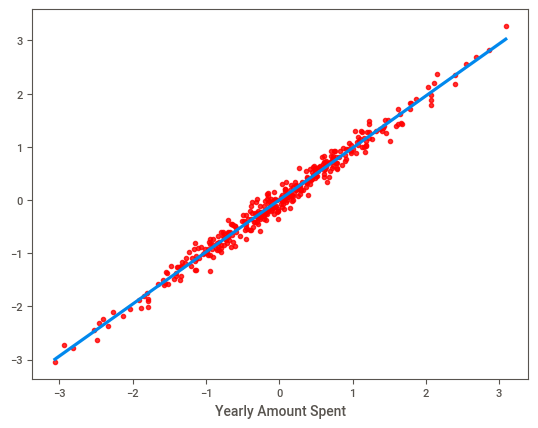

In [70]:
sns.regplot(data=std_data,x=y_test,y=y_pred,scatter_kws={"color":"red"})
plt.show()

## Using Stats 

In [71]:
import statsmodels.api as sm

In [72]:
ml=sm.add_constant(features)

In [73]:
ml

,const,Avg Session Length,Time on App,Time on Website,Length of Membership
0,1.0,1.456351,0.607280,2.493589,0.550107
1,1.0,-1.136502,-0.949464,0.206556,-0.870927
2,1.0,-0.052723,-0.727139,0.049681,0.572067
3,1.0,1.263010,1.676390,-0.335978,-0.413996
4,1.0,0.279838,0.747770,0.471737,0.914422
...,...,...,...,...,...
495,1.0,0.186035,1.524003,-0.636429,0.213479
496,1.0,1.663357,-0.359187,0.128603,0.043139
497,1.0,-0.409872,-0.556854,1.260187,1.427261
498,1.0,0.271597,0.341248,-0.218291,-1.199042


In [74]:
DD=sm.OLS(target,ml)

In [75]:
result=DD.fit()

In [76]:
result.params

const                  -9.020562e-17
Avg Session Length      3.220445e-01
Time on App             4.852216e-01
Time on Website         5.564155e-03
Length of Membership    7.758054e-01
dtype: float64

In [77]:
result.rsquared

0.9843155370226726

In [78]:
result.rsquared_adj

0.9841887938875022

In [79]:
result.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000015FD366A690>>

## KNN

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
knn=KNeighborsRegressor(n_neighbors=5)

In [82]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [83]:
y_pred=knn.predict(x_test)

In [84]:
y_pred

array([ 6.59461271e-01,  8.21510171e-01,  8.87037714e-01,  3.88177534e-01,
        2.44387747e-01,  5.34371974e-01,  6.33083595e-01, -1.17072875e+00,
        4.56350219e-01,  7.18161879e-01,  3.93185298e-01,  2.48997090e-01,
       -9.55581206e-01,  1.19406458e+00,  6.26138166e-01, -2.33497890e-01,
        9.29107897e-01,  2.21192924e-01, -4.72010680e-01, -7.12550625e-01,
        6.24929377e-01,  4.02920544e-02, -8.28200030e-01, -6.93579575e-01,
       -7.85589934e-01, -1.16872969e+00,  4.15238421e-01,  1.10019919e+00,
        2.81717169e-01, -9.71482876e-01, -7.52670541e-02, -2.27948373e-01,
       -9.11250589e-01,  9.06320116e-02,  4.02519313e-02, -1.28141703e-01,
        3.14332762e-01, -9.12859210e-01, -4.90068690e-01,  3.56942867e-01,
       -7.47599043e-01,  5.95262640e-01, -4.08521491e-01,  1.01486106e+00,
       -1.32875130e+00,  2.55425448e-01,  2.56227000e-01,  1.16249367e+00,
       -1.41550890e+00,  1.03552299e+00, -1.04366833e+00, -1.33753291e+00,
       -1.05364130e+00, -

In [85]:
knn.score(x_test,y_test)

0.8360077835890438

In [86]:
print("KNN MSE:", mean_squared_error(y_test, y_pred))
print("KNN MAE:", mean_absolute_error(y_test, y_pred))

KNN MSE: 0.16498147353256704
KNN MAE: 0.29390957620153624


In [87]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

In [88]:
r2

0.8360077835890438

## Decision tree

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
si=SimpleImputer(strategy='median')

In [91]:
x_train_impute=si.fit_transform(x_train)
x_test_impute=si.fit_transform(x_test)

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
dec_tree=DecisionTreeRegressor(criterion="squared_error",splitter='best')

In [94]:
dec_tree.fit(x_train_impute,y_train)

DecisionTreeRegressor()

In [95]:
y_pred=dec_tree.predict(x_test_impute)

In [96]:
y_pred

array([ 9.47829199e-01,  9.96114613e-01,  6.06434572e-01,  8.97801530e-01,
       -2.19454625e-03, -5.83941126e-02,  1.19845944e+00, -1.15399971e+00,
        5.73806782e-01, -3.22899399e-01,  9.96114613e-01,  3.67326744e-01,
       -9.91682230e-01,  1.45643558e+00,  5.73806782e-01, -8.43472070e-01,
        1.19845944e+00, -1.32869571e-01, -1.35076945e+00, -6.84691870e-01,
        3.90702386e-02, -8.43472070e-01, -8.43472070e-01, -4.62640522e-01,
       -7.48545100e-01, -2.16993953e+00,  6.06434572e-01,  1.33459242e+00,
        7.46639507e-02, -1.55204739e+00, -2.61622269e-01, -4.21840669e-01,
       -9.28485514e-01, -9.84249216e-01,  5.14144895e-02,  6.90103371e-01,
        5.26731467e-01, -5.95584765e-01,  4.92627478e-02,  1.24219486e+00,
       -1.20586384e+00, -5.83941126e-02, -1.37899332e-01,  1.48339561e+00,
       -2.16993953e+00,  9.52013313e-01,  5.14144895e-02,  1.11865385e+00,
       -1.78862668e+00,  1.48339561e+00, -9.71097204e-01, -1.44079113e+00,
       -1.35076945e+00, -

In [97]:
print("KNN MSE:", mean_squared_error(y_test, y_pred))
print("KNN MAE:", mean_absolute_error(y_test, y_pred))

KNN MSE: 0.2252762990671972
KNN MAE: 0.3761803963860029


In [98]:
r2 = r2_score(y_test, y_pred)

In [99]:
r2

0.7760744961367163

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
ran_for=RandomForestRegressor(n_estimators=100)

In [102]:
ran_for.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
y_pred=ran_for.predict(x_test)

In [104]:
y_pred

array([ 7.37291490e-01,  7.27507894e-01,  8.23293526e-01,  7.81302206e-01,
       -1.16061462e-01,  1.59252148e-01,  1.05870514e+00, -1.09326071e+00,
        1.85464341e-01,  1.23164332e-03,  7.43116846e-01,  1.62946780e-01,
       -1.08983459e+00,  1.42644684e+00,  6.01727261e-01, -3.34565006e-01,
        1.21501948e+00, -9.05828117e-02, -1.04575500e+00, -9.04388552e-01,
        7.29449629e-01, -1.74804166e-01, -6.73108269e-01, -6.53877693e-01,
       -3.98611719e-01, -1.56949322e+00,  3.48223951e-01,  1.17490799e+00,
        4.25428852e-02, -1.73961974e+00, -1.83565040e-02, -6.65341562e-02,
       -9.37597897e-01, -2.22682580e-01, -4.80940046e-02,  4.67408575e-01,
        5.69130177e-01, -8.74215886e-01, -2.11955046e-01,  8.29118760e-01,
       -1.15541814e+00,  3.32451017e-01, -4.93780632e-01,  1.26315140e+00,
       -2.05902486e+00,  3.60804653e-01, -4.38047360e-02,  1.24350023e+00,
       -1.39691066e+00,  1.33181049e+00, -9.53764611e-01, -1.37286708e+00,
       -9.83351108e-01, -

In [105]:
print("KNN MSE:", mean_squared_error(y_test, y_pred))
print("KNN MAE:", mean_absolute_error(y_test, y_pred))

KNN MSE: 0.10508891794235546
KNN MAE: 0.24016009091512727


In [106]:
r2 = r2_score(y_test, y_pred)

In [107]:
r2

0.8955412131763143

# Gradiesnt Boosting Regression

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [109]:
# Initialize and fit the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [110]:
# Predictions and evaluation
y_pred_g = gb_regressor.predict(x_test)
mse_gb = mean_squared_error(y_test, y_pred_g)
print(f'Gradient Boosting Regressor MSE: {mse_gb}')

Gradient Boosting Regressor MSE: 0.06387819622273726


In [111]:
print("KNN MSE:", mean_squared_error(y_test, y_pred_g))
print("KNN MAE:", mean_absolute_error(y_test, y_pred_g))

KNN MSE: 0.06387819622273726
KNN MAE: 0.19267397426395497


In [112]:
r2 = r2_score(y_test, y_pred_g)
r2

0.9365048283628477

# Ridge Regression

In [113]:
from sklearn.linear_model import Ridge

In [114]:
# Initialize and fit Ridge Regressor
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(x_train, y_train)

Ridge()

In [115]:
# Predictions and evaluation
y_pred_ridge = ridge_regressor.predict(x_test)

In [116]:
print("KNN MSE:", mean_squared_error(y_test, y_pred_ridge))
print("KNN MAE:", mean_absolute_error(y_test, y_pred_ridge))

KNN MSE: 0.01769555249820095
KNN MAE: 0.10536525410994968


In [117]:
r2 = r2_score(y_test, y_pred_ridge)
r2

0.9824105530599254

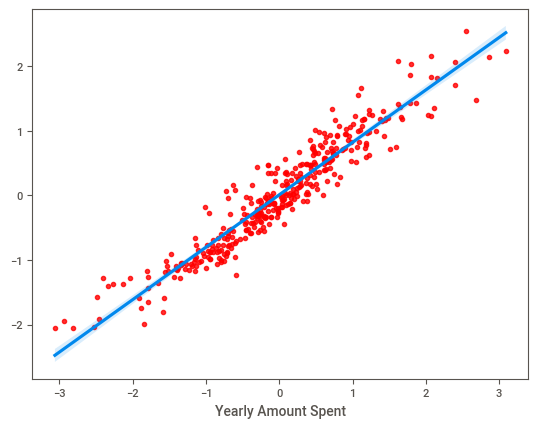

In [118]:
sns.regplot(data=std_data,x=y_test,y=y_pred,scatter_kws={"color":"red"})
plt.show()

# SVM

In [119]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [120]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [121]:
y_pred_svm = svm_regressor.predict(x_test)

In [122]:
print("KNN MSE:", mean_squared_error(y_test,y_pred_svm))
print("KNN MAE:", mean_absolute_error(y_test, y_pred_svm))

KNN MSE: 0.017538562690505976
KNN MAE: 0.10474225364377196


In [123]:
r2 = r2_score(y_test, y_pred_svm)
r2

0.9825666015298935

# Neural Network

In [124]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [125]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=75)
nn_regressor.fit(x_train, y_train)

MLPRegressor(max_iter=1000, random_state=75)

In [126]:
y_pred_nn = nn_regressor.predict(x_test)

In [127]:
print("KNN MSE:", mean_squared_error(y_test,y_pred_nn))
print("KNN MAE:", mean_absolute_error(y_test, y_pred_nn))

KNN MSE: 0.025383931773268684
KNN MAE: 0.12877125844099058


In [128]:
r2 = r2_score(y_test, y_pred_nn)
r2

0.9747682746214466

# ModelDeployment

In [ ]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

st.title('Model Deployment: Logistic Regression')
st.sidebar.header('User Input Parameters')

def user_input_features():
    avg_session =st.sidebar.text_input('Avg Session Length')
    app_time =st.sidebar.text_input('Time on App')
    web_time =st.sidebar.text_input('Time on Website')
    mem_len =st.sidebar.text_input('Length of Membership')
    try:
        avg_session = float(avg_session)
        app_time = float(app_time)
        web_time = float( web_time)
        mem_len = float(mem_len)
    except ValueError:
        st.error('Please enter numeric values for features.')
        return
    data = {'Avg Session Length': avg_session,
            'Time on App': app_time,
             'Time on Website': web_time,
            'Length of Membership': mem_len}
    features = pd.DataFrame(data,index = [0])
    return features
df =user_input_features()
st.subheader('User Input Parameters')
st.write(df) 
# reading data
data = pd.read_csv(r'C:\Users\gokul\OneDrive\Desktop\Excelr\PROJECT FILES\dataset\data.csv')
# spliting features and target variable
x = data.iloc[: , : 4]
y = data.iloc[: , 4]
#split train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)
# model building
model = LinearRegression()
model.fit(x_train, y_train)
#prediction
prediction = model.predict(df)
#output
st.subheader('PREDICTION RESULT')
st.write(prediction)

## Auto ML

In [129]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Load the data
file_path = r'C:\Users\Deepak\Downloads\Ecommerce_Customers.csv'
data = pd.read_csv(file_path)

# Step 2: Preprocess the data as needed
# For example, handle missing values, encode categorical variables, and scale numerical features

# Step 3: Split the data into training and testing sets
X = data.drop(columns=['Yearly Amount Spent','Email','Address','Avatar'])  # Features
y = data['Yearly Amount Spent']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Run TPOT
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Step 5: Evaluate the best pipeline
print("The cross-validated R^2 score on the training set is:", tpot.score(X_train, y_train))
print("The R^2 score on the test set is:", tpot.score(X_test, y_test))

# Step 6: Export the best pipeline
tpot.export('best_pipeline.py')


C:\Users\Deepak\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -98.54293961386026

Generation 2 - Current best internal CV score: -98.54293961386026

Generation 3 - Current best internal CV score: -98.54293961386026

Generation 4 - Current best internal CV score: -98.54293961382207

Generation 5 - Current best internal CV score: -98.54293961382207

Best pipeline: RidgeCV(PCA(input_matrix, iterated_power=1, svd_solver=randomized))
The cross-validated R^2 score on the training set is: -95.82287662609605
The R^2 score on the test set is: -109.82024999305997
